# Проект Принятие решений в бизнесе

В данном проекте мне в качестве аналитика крупного интернет-магазина было необходимо выполнить приоритизацию гипотез и проанализировать А/В тест. Для выполнения первой части мне были доступны данные о гипотезах с их кратким описанием и оценками различных показателей по десятибальной шкале. 
Для приоритизации гипотез я планирую применить распространенные фреймворки ICE и RICE, сравнив полученные очки и сделав по итогам соответствующие выводы.

Вторая часть проекта заключается в оценке и визуализации метрик продаж интернет-магазина, а также проведении А/В теста и оценке его результатов. На данном этапе я планирую выполнить следующие шаги:

1. Визуализировать данные о кумулятивной выручке и среднем чеке по группам, построив графики, для дальнейшего анализа и наглядного представления динамики и различий в случае их наличия;
2. Выявить аномальные данные о количестве заказов и выручке на одного пользователя, которые могут повлиять на результаты А/В теста, визуализировав соответствующие данные и оценив их процентили.
3. Посчитать статистические значимости различий между двумя группами в средней выручке и среднем количестве заказов по "сырым" и очищенным данным, выявить наличие или отсутствие отличий.
4. Принять решение по результатам выполнения теста.

## Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
pd.set_option('max_colwidth', 200)
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Как видно из приведенной выше таблицы, к оценке и приоритизации представлены девять гипотез, а также необходимые данные об их охвате, влиянии на пользователей, уверенности в оценках и сложности их проверки.

In [4]:
hypothesis['ice_score'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 3)
display(hypothesis.sort_values(by = 'ice_score', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


In [5]:
hypothesis['rice_score'] = round(hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 3)
display(hypothesis.sort_values(by = 'rice_score', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.0


Выше были применены два фреймворка для приоритизации гипотез ICE и RICE. Первый рассчитывается по следующей формуле: произведение показателей влияния на пользователей Impact и уверенности в оценках других параметров Confidence делят на показатель сложности проверки данной гипотезы Efforts. При расчете очков RICE в числитель добавляется показатель охвата Reach.

Итоговые результаты после применения разных фреймворков ожидаемо отличаются. Гипотеза №8 "Запустить акцию, дающую скидку на товар в день рождения", которая была первой в списке приоритетов после применения фреймворка ICE, оказалась только на пятой позиции по количеству очков RICE, что связано с низким уровнем охвата пользователей. После применения второго фреймворка первой в списке оказалась гипотеза №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", очевидно, благодаря высоким показателям охвата. На втором и третьем месте после применения двух фреймворков ICE и RICE соответственно оказалась гипотеза под номером 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" с высоким показателем влияния на пользователей Impact. В обеих фреймворках гипотезы номер 7 и 0 оказались в тройке лидеров, поменялись лидеры и порядок следующих в списке гипотез. 

Первой к проверке кажется логичным принять гипотезу номер 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

## Часть 2. Анализ A/B-теста

### Первое знакомство с данными

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

В нашем распоряжении данные о 1197 заказах пользователей, которые включают в себя номер транзакции, идентификатор пользователя, совершившего заказ, дату и стоимость заказа, а также соответствующую группу А/В теста, в которую попал пользователь.

In [8]:
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

В датафрейме visitors данные о датах проведения А/В теста в течение месяца и количестве пользователей одной и второй групп в соответствующую дату.

### Предобработка данных

Выполним проверку данных на дубликаты.

In [9]:
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

In [10]:
display(orders.query("group == 'A'")['visitorId'].isin(orders.query("group == 'B'")['visitorId']).sum())

89

В обеих таблицах не было обнаружено дубликатов. Однако 89 пользователей попали в обе группы, что также может повлиять на результаты теста.

Приведем столбцы с датами из обеих таблиц к нужному формату для удобства обработки и визуализации.

In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### Визуализация данных

#### График кумулятивной выручки по группам

In [12]:
datesGroups = orders[['date','group']].drop_duplicates()
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [13]:
print(cumulativeData['date'].max(), cumulativeData['date'].min())
print(orders['date'].max(), orders['date'].min())

2019-08-31 00:00:00 2019-08-01 00:00:00
2019-08-31 00:00:00 2019-08-01 00:00:00


В таблице выше мы получили агрегированные данные проведения А/В теста о количестве пользователей, покупателей, а также кумулятивной выручке по двум группам. Максимальная и минимальная даты в исходных и агрегированных данных совпадают.

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

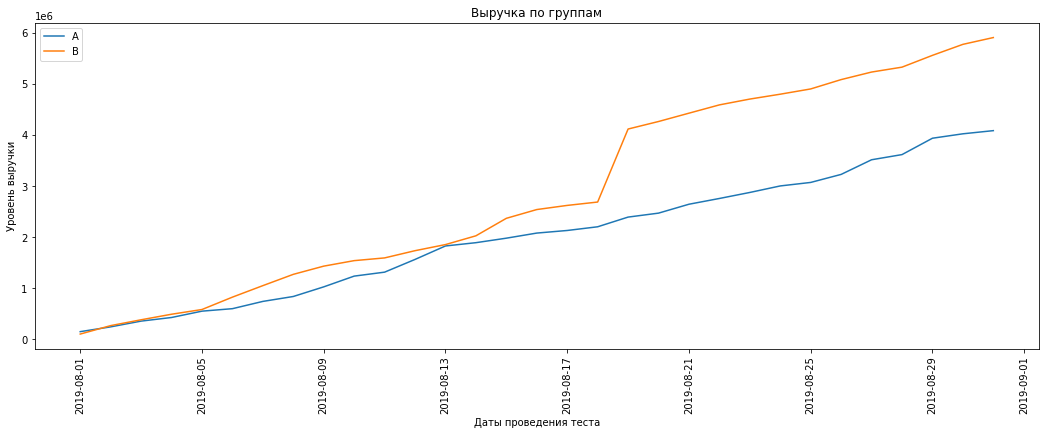

In [15]:
# Строим график выручки группы А
plt.figure(figsize=(18,6))
plt.title('Выручка по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.xticks(rotation=90)

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xlabel("Даты проведения теста")
plt.ylabel("Уровень выручки")
plt.show()

На графике кумулятивной выручки по группам за месяц проведения А/В теста превосходство группы В становится очевидным после стабилизации результатов примерно на второй неделе проведения теста. В показателях группы В можно отметить один резкий скачок в районе 18-20 августа, причины и общее влияние которого необходимо изучить дополнительно.

#### График кумулятивного среднего чека по группам

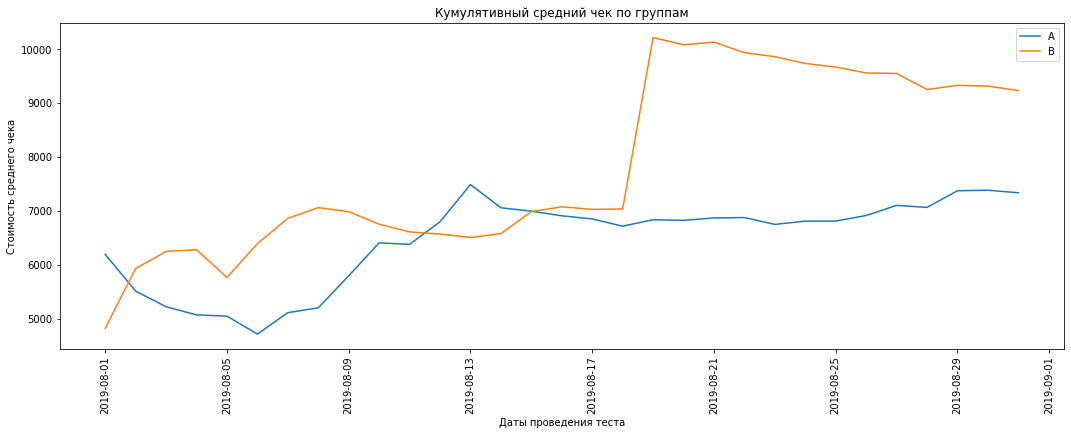

In [16]:
plt.figure(figsize=(18,6))
plt.title('Кумулятивный средний чек по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel("Даты проведения теста")
plt.ylabel("Стоимость среднего чека")
plt.show()

Графики кумулятивного среднего чека по группам не такие плавные, как графики кумулятивной выручки, в их росте наблюдаются значительные скачки. Во второй половине месяца превосходство группы В в показателях среднего чека становится очевидным, что происходит как раз после резкого скачка, совпадающего по времени с выше выявленным скачком выручки 18-20 августа. Далее показатели среднего чека группы В немного снижаются, но остаются на уровне выше группы А.

#### График относительного изменения кумулятивного среднего чека группы В к группе А

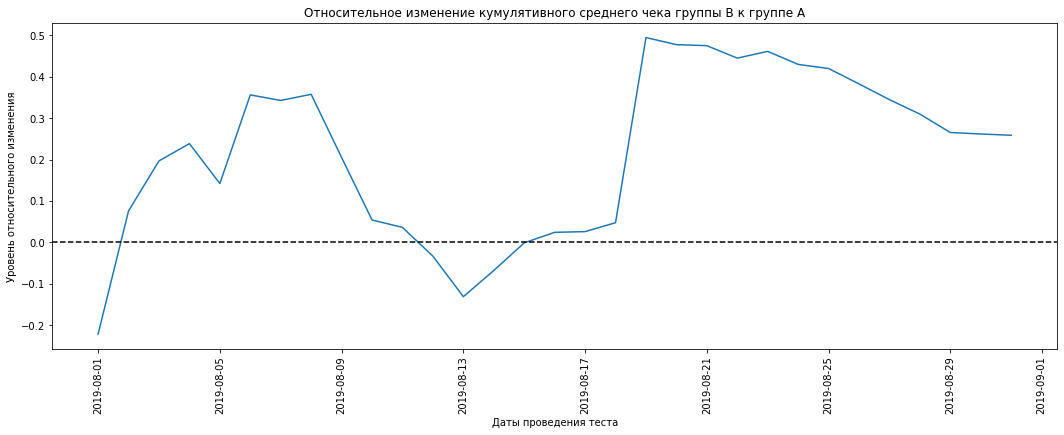

In [17]:
#Постройте график относительного изменения кумулятивного среднего чека группы B к группе A
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(18,6))
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=90)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Даты проведения теста")
plt.ylabel("Уровень относительного изменения")
plt.show()

На графике относительного изменения кумулятивного среднего чека группы В к группе А можно увидеть более высокие показатели тестовой группы на протяжении всего периода проведения теста с одним скачком в пользу группы А в 12-15ых числах августа. После уже выявленного скачка среднего чека в группе В превосходство остается на ее стороне до конца тестового периода с некоторым снижением показателей.

#### График кумулятивного среднего количества заказов на посетителя по группам

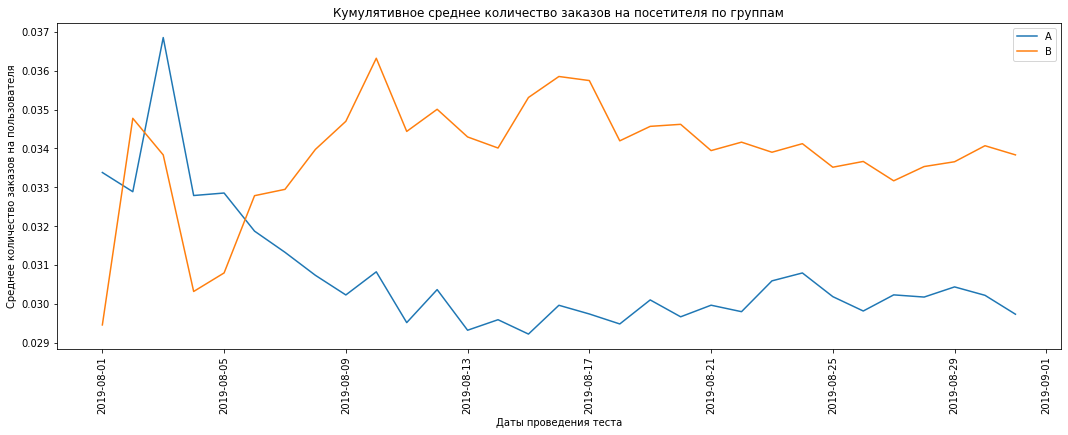

In [18]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.legend()
plt.xlabel("Даты проведения теста")
plt.ylabel("Среднее количество заказов на пользователя")
plt.show()

Визуализация кумулятивного среднего количества заказов на посетителя по группам представляет похожую картину соотношения двух групп. Данный показатель выравнивается для обеих групп после первого скачка и пары дней превосходства количества заказов пользователей группы А, оставаясь для группы А на достаточно низких показателях 0.030 - 0.031, для группы В этот показатель еще после пары скачков устанавливается на уровне 0.034-0.035 (примерно на 12% превышая показатель контрольной группы).

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

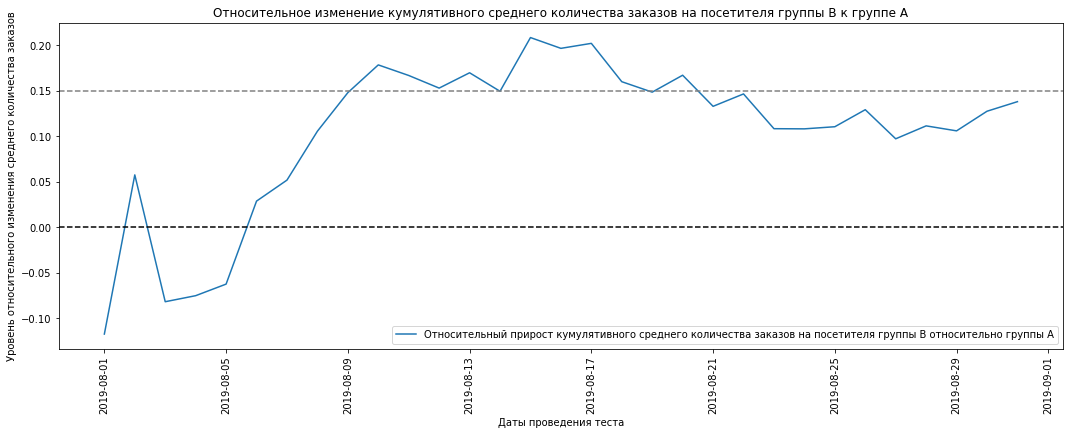

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel("Даты проведения теста")
plt.ylabel("Уровень относительного изменения среднего количества заказов")
plt.show()

На выше приведенном графике видно, что среднее количество заказов на пользователя группы В начинает превосходить группу А примерно через неделю после начала проведения теста. С течением времени превосходство группы В увеличивается, достигая максимума к середине месяца (15-17 августа) и, немного снижаясь, выравнивается к концу тестового периода.

Теперь сосредоточимся на выявлении аномалий в данных, которые могут вносить ненужные шумы и даже искажать результаты теста.

### Определение аномалий

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


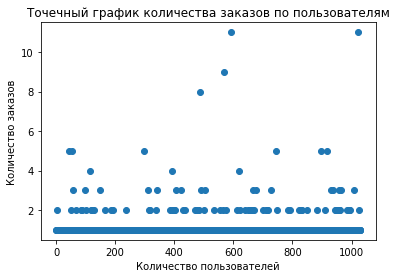

In [20]:
#точечный график количества заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel("Количество пользователей")
plt.ylabel("Количество заказов")
plt.show()


На точечном графике количества заказов по пользователям видно, что более четырех заказов оформило незначительное количество покупателей, а основная масса оформила 1-2 заказа.

In [21]:
#95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Расчет перцентилей подтверждает выявленные на графике аномалии: более 4 заказов оформил лишь 1% пользователей, что делает возможным очищение таблиц от этих данных для более точных расчетов статистической значимости отличий.

      transactionId  revenue
168       590470918  1294500
1107     3936777065   202740
49        192721366    93940
188       666610489    92550
1029     3668308183    86620
322      1216533772    78990
503      1811671147    78990
1000     3603576309    67990
364      1348774318    66350
81        316924019    65710


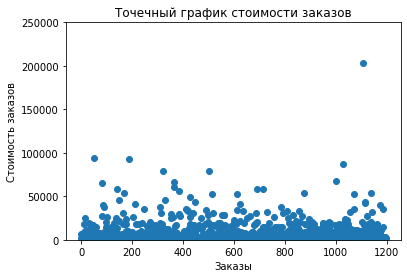

In [22]:
# точечный график стоимостей заказов
revenueByOrders = (
    orders.groupby('transactionId', as_index = False)
    .agg({'revenue': 'sum'})
)
revenueByOrders.columns = ['transactionId', 'revenue']
print(revenueByOrders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0,len(revenueByOrders)))
plt.title('Точечный график стоимости заказов')
plt.ylim(top=250000)
plt.scatter(x_values, revenueByOrders['revenue'])
plt.xlabel("Заказы")
plt.ylabel("Стоимость заказов")
plt.show()

Основная масса заказов выполнена на сумму до 50000, в диапазон 50000-100000 попадают лишь точечные заказы, на сумму выше 100000 на графике виден лишь один заказ.

In [23]:
#95-й и 99-й перцентили стоимости заказов на пользователя
print(np.percentile(revenueByOrders['revenue'], [95, 99]))

[28000.  58233.2]


Определение процентилей помогает выявить границу аномальности заказов: выше 58233.2 их всего 1%. Таким образом можно отфильтровать данные о заказах по верхней границе в 58233.2.

### Расчет статистической значимости

#### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**Нулевая гипотеза H0:** нет отличия между группами в среднем количестве заказов.
**Альтернативная гипотеза H1:** среднее количество заказов между группами отличается.
**Уровень статистической значимости α** = 0.05
Для проверки используется **метод Манна-Уитни** для оценки различий между двумя независимыми и малыми выборками по уровню количественного критерия.

In [24]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value равен", "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительная разница между двумя сегментами:", "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value равен 0.017
Относительная разница между двумя сегментами: 0.138


Уже по "сырым" данным выявлена статистическая значимость различий между двумя группами, так как p-value меньше 0.05. Разница между сегментами также достаточно значительна - почти 14%. 

***Отвергаем нулевую гипотезу об идентичности показателей количества заказов в контрольной и тестовой группах.***

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**Нулевая гипотеза H0:** нет отличия между группами в среднем чеке заказа.
**Альтернативная гипотеза H1:** средний чек заказа между группами отличается.
**Уровень статистической значимости α** = 0.05
Для проверки используется **метод Манна-Уитни** для оценки различий между двумя независимыми и малыми выборками по уровню количественного критерия.

In [25]:
print("P-value равен", '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительная разница между двумя сегментами:", '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value равен 0.729
Относительная разница между двумя сегментами: 0.259


По "сырым" данным не выявлено статистической значимости различий между группами, хотя расчет относительной разницы в среднем чеке между тестовой и контрольной группами выдает цифру в 25%. P-value значительно превышает заданный уровень альфа.

***Нет оснований отвергнуть нулевую гипотезу об идентичности показателей среднего чека в контрольной и тестовой группах.*** Рассчитанная относительная разница не имеет статистической значимости, может быть вызвана наличием аномалий в данных и требует дополнительной проверки.

In [26]:
#уберем аномальные данные
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(revenueByOrders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
15


Пользователей с нетипичным количеством и суммой заказов всего 15, их поведение может влиять на результаты теста. После подсчета статистической значимости по очищенным данным можно будет сделать выводы о силе их влияния.

#### Статистическая значимость различий в среднем количестве заказов на пользователя между группами по очищенным данным

**Нулевая гипотеза H0:** нет отличия между группами в среднем количестве заказов.
**Альтернативная гипотеза H1:** среднее количество заказов между группами отличается.
**Уровень статистической значимости α** = 0.05
Для проверки используется **метод Манна-Уитни** для оценки различий между двумя независимыми и малыми выборками по уровню количественного критерия.

In [27]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print("P-value равен", '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительная разница между двумя сегментами:", '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value равен 0.014
Относительная разница между двумя сегментами: 0.153


P-value, рассчитанный по очищенным данным, уменьшился, разница между сегментами увеличилась. Можно сделать вывод о том, что аномальные данные влияли на результаты А/В теста.
***Отвергаем нулевую гипотезу об идентичности показателей количества заказов в контрольной и тестовой группах.***

#### Статистическая значимость различий в среднем чеке заказа между группами по очищенным данным

**Нулевая гипотеза H0:** нет отличия между группами в среднем чеке заказа.
**Альтернативная гипотеза H1:** средний чек заказа между группами отличается.
**Уровень статистической значимости α** = 0.05
Для проверки используется **метод Манна-Уитни** для оценки различий между двумя независимыми и малыми выборками по уровню количественного критерия.

In [28]:
print("P-value равен", 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительная разница между двумя сегментами:", 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value равен 0.851
Относительная разница между двумя сегментами: -0.006


После очищения данных уровень статистической значимости различий между двумя группами увеличился, рассчитанная относительная разница между сегментами показала отсутствие преимущества группы В. ***Таким образом, нет оснований отвергать гипотезу об относительной идентичности показателей среднего чека в двух группах.***

### Итоговый вывод

Таким образом, по итогам проведения А/В теста можно сделать следующие выводы:
    
    - выявлена статистическая значимость различий между двумя группами в количестве заказов и по "сырым", и по очищенным данным. Есть основания отвергнуть нулевую гипотезу в пользу альтернативной о том, что разница между группами значительная.
    - не выявлено статистической значимости в показателях среднего чека в контрольной и тестовой группах, нулевую гипотезу не отвергаем.
    - аномальные данные оказывали влияние на результаты теста, но не на его итоговый вывод. После их удаления различие в количестве заказов между двумя группами стало еще заметнее, а разница в показателях среднего чека стала меньше.
    
Можно предположить, что выявленный скачок в показателях среднего чека для группы В оказал влияние на относительную разницу, но в итоге статистически значимых изменений не произошло. Проведение теста можно остановить, так как в случае с количеством заказов разница очевидна, а для показатели среднего чека она не достигает уровня статистической значимости, хотя на графиках визуализации ее можно явно увидеть. Необходимо оценить и выявить факторы, повлиявшие на контрольную группу помимо целевых изменений, соответствующих проверяемой гипотезе. Если есть эффект для количества заказов на пользователя, но нет влияния на общую выручку, значит, можно предположить, что заказы в контрольной группе оформлялись на меньшую сумму, хоть и в большем количестве. Явно необходима переформулировка гипотезы и проверка других, если главной целью является увеличение выручки от заказов. График различия среднего чека между группами показывает значительно лучшие результаты для группы В, но можно предположить, что они были вызваны сторонними факторами.